In [1]:
import mlflow as mlflow
import pandas as pd
from matplotlib import pyplot as plt
from mlflow.models import infer_signature
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

model_name = "model"
run_name = "iris-experiment"

# Initiate automatic logging
mlflow.autolog()

# Tag experiment
mlflow.set_experiment_tag('dataset', 'iris')
# OR use env variable export MLFLOW_TRACKING_URI=sqlite:////mlflow.sqlite & MLFLOW_REGISTRY_URI
mlflow.set_tracking_uri('file:../local_data/mlruns')
mlflow.set_registry_uri('sqlite:///../local_data/mlflow.sqlite')

2022/12/07 09:33:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [2]:
# Load sample dataset
#TODO: READ DATA FROM REDASH
df = pd.read_csv('iris_dataset.csv')
y = df.pop('variety')
X = df

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Start new experiment run and train model using iris dataset.
Model training complete.


Registered model 'model' already exists. Creating a new version of this model...
2022/12/07 09:33:35 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: model, version 2


Model model saved in run 601c013cb3b14c5082ccae28baa0daf6


Created version '2' of model 'model'.


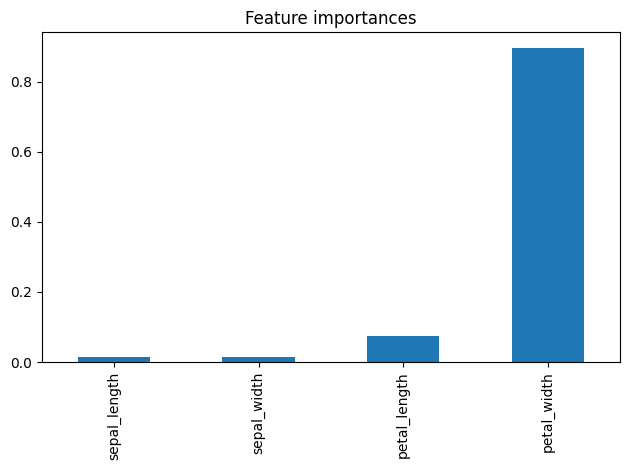

In [3]:
# Start run and train a model
# Note: You could for example create multiple runs with different hyperparameters
# Then you could compare them in mlflow ui.
with mlflow.start_run(run_name=run_name):

    print("Start new experiment run and train model using iris dataset.")

    # Create decision tree classifier
    classifier = DecisionTreeClassifier(criterion='entropy')

    # Train the model using the training sets
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    print("Model training complete.")

    # Metrics
    metrics_data = metrics.classification_report(y_test, y_pred, output_dict=True)

    # Infer schema for model
    signature = infer_signature(X_train, y_train)

    # You can log whatever you want, for example subset of data for testing
    mlflow.log_text("Hello world!", 'custom_log.txt')

    # store figure

    forest_importances = pd.Series(classifier.feature_importances_, index=classifier.feature_names_in_)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances")
    fig.tight_layout()
    mlflow.log_figure(fig, 'feature_importances.png')

    # Model registry does not work with file store
    mlflow.sklearn.log_model(
        classifier, model_name, signature=signature, registered_model_name=model_name
    )
    print("Model {} saved in run {}".format(model_name, mlflow.active_run().info.run_uuid))